# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data 


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [1]:
import numpy as np
import pandas as pd
from typing import List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [5]:
na = data.shape[0] - data.count()
na[na > 0]

keyword       61
location    2533
dtype: int64

In [6]:
data.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

Видим, что есть пропуски в колонках `keyword, location`, обе - типа object , причем в `location` их довольно много (треть датасета). Заполним их по заданию - пустыми строчками

In [7]:
data = data.fillna('')
print(data.isna().any().any())
data.head()

False


,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
1,4,,,Forest fire near La Ronge Sask. Canada,1
2,5,,,All residents asked to 'shelter in place' are ...,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1


## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?


In [8]:
print(data['target'].value_counts())
print(data['target'].value_counts(normalize=True))

0    4342
1    3271
Name: target, dtype: int64
0    0.57034
1    0.42966
Name: target, dtype: float64


Видно, что текстов (твитов) относительно целевой переменной примерно поровну (57/43 настоящих/фейковых твитов, если быть точным душным). Датасет в этом плане оч хороший 

2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [9]:
popular_keywords = data['keyword'].value_counts(sort=True, ascending=False)[:10].index
popular_keywords

Index(['', 'fatalities', 'deluge', 'armageddon', 'sinking', 'damage', 'harm',
       'body%20bags', 'evacuate', 'fear'],
      dtype='object')

Видим, что пустая строчка является самым популярным ключевым словом, это не есть хорошо. Поэтому просто добавим еще одну проверку и получим только существющие ключевые слова 

In [10]:
popular_keywords = data[data['keyword'] != '']['keyword'].value_counts(sort=True, ascending=False)[:10].index
popular_keywords

Index(['fatalities', 'deluge', 'armageddon', 'sinking', 'damage', 'harm',
       'body%20bags', 'outbreak', 'evacuate', 'fear'],
      dtype='object')

Теперь создадим датафрейм где ключевое слово - из топ 10 популярных

In [11]:
data_popular = data[['keyword', 'target']][data['keyword'].isin(popular_keywords)]
# data_popular['count'] = 1

print(data_popular.shape[0])
data_popular.head()

413


,keyword,target
304,armageddon,0
305,armageddon,0
306,armageddon,0
307,armageddon,0
308,armageddon,0


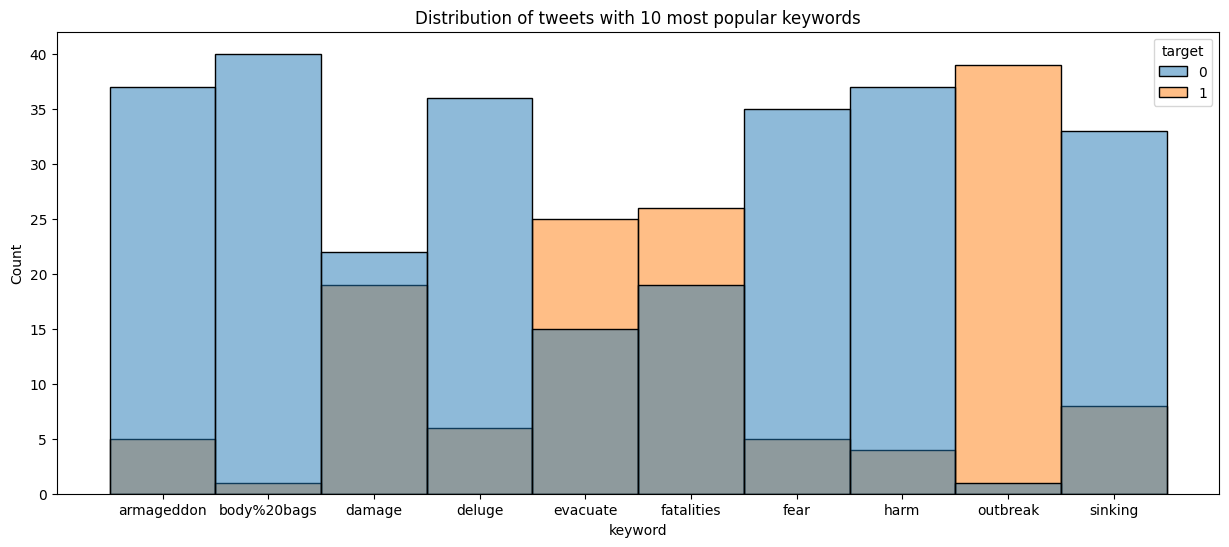

In [12]:
plt.figure(figsize=(15, 6))
plt.title('Distribution of tweets with 10 most popular keywords')

sns.histplot(data_popular, x='keyword', hue='target')

plt.show()

In [13]:
# -- YOUR CODE HERE --
plt.show()

**Выводы**:

1) Можно заметить, что фейковых твитов здесь сильно больше, только в 3 из 10 случаев, а именно для ключевых слов *evacuate, fatalities, outbreak*, правдивых твитов больше

2) Значительное превалирование фейков видно у совсем кликбейтных слов по типу *armageddon, body bags, deluge*. А если твит содержит слово *outbreak*, то почти гарантированно он правдивый

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [14]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,NaN,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


Почему мы делили выборку на тестовую и тренировочную до заполнения пропусков это конечно очень интересный вопрос...

In [15]:
train_new = train.drop('id', axis=1).fillna('')

train_new['text'] = train_new['keyword'] + ' ' + train_new['location'] + ' ' + train_new['text']
train_new.drop(['keyword', 'location'], inplace=True, axis=1)

In [16]:
train_new.loc[[6590, 7122, 2769]]

,text,target
6590,"survivors Marietta, GA Stemming from my #Cubs ...",1
7122,violent%20storm If you were the NWS wth a rot...,1
2769,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...,0


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vec = CountVectorizer()

tokens = cnt_vec.fit_transform(train_new['text'])
tokens.shape

(5329, 18455)

Размер матрицы довольно большой (получили около 18к токенов), но для NLP это так, цветочки

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [18]:
import re

def contains_digit(s: str) -> bool:
    # Проверка, содержит ли слово цифры
    return not not re.search(r'\d', s)

def contains_punctuation(s: str) -> bool:
    # Проверка, содержит ли слово пунктуацию
    return not not re.search(rf'[{punctuation}]', s)

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    return s[0] == '#'

def is_mention(s: str) -> bool:
    # Проверка, является ли слово упоминанием
    return s[0] == '@'

def investigate_vocabulary(vocabulary):
    keys = vocabulary.keys()
    print('With digit:      ', sum(map(contains_digit, keys))
          )
    print('With punctuation:', sum(map(contains_punctuation, keys))
          )
    print('Hashtags:        ', sum(map(is_hashtag, keys))
          )
    print('Mentions:        ', sum(map(is_mention, keys))
          )
    

Теперь пояснения :)
- Регулярки это как наиболее правильный спобоб, никаких брутфорсов по крайней мере
- `not not` вместо `bool()` хорошо поясняется в видосе mCoding (если вкратце - это быстрее, потому что вызов функции - дорогая операция)
- делать `lstrip()` вроде необязательно (для проверки # и @), потому что `CountVectorizer` убирает все пробелы из токенов 

In [19]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit:       2
With punctuation: 7
Hashtags:         1
Mentions:         3


In [20]:
investigate_vocabulary(cnt_vec.vocabulary_)

With digit:       3812
With punctuation: 315
Hashtags:         0
Mentions:         0


Видим, что слов с хэштегами и упоминаниями нет (наверное потому что у `CountVectorizer` под капотом примитивный токенайзер). Поэтому выведем только сообщения, содержащие цифры и знаки препинания. Если нужно сделать так и для других условий, нужно просто подставить нужную функцию фильтра

In [21]:
msg_with_dig = list(filter(contains_digit, cnt_vec.vocabulary_))
msg_with_punc = list(filter(contains_punctuation, cnt_vec.vocabulary_))
print(msg_with_dig[:10])
print(msg_with_punc[:10])

['20collapse', '2015', '60', 't5trhjuau0', 'b1g', 'bmurph1019', 'termn8r13', 'oaskgki6qj', 'di8elzswnr', '20accident']
['hail_youtsey', 'û_', '_gaabyx', 'early__may', 'til_now', 'marc_holl', 'mathew_is_angry', 'z3ke_sk1', 'derailed_benchmark', 'chubbysquirrel_']


Видим, что к пунктуации относятся нижние подчеркивания. Если же их не брать в расчет, других знаков пунктуации просто нет

## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [25]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [26]:
cnt_vec2 = CountVectorizer(tokenizer=TweetTokenizer)
toks = cnt_vec2.fit_transform(train_new['text'])
cnt_vec2.vocabulary_.keys()

TypeError: 'TweetTokenizer' object is not iterable

In [ ]:
investigate_vocabulary(cnt_vec2.vocabulary_)

AttributeError: 'CountVectorizer' object has no attribute 'vocabulary_'

**Сравнение:** TODO

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer



In [ ]:
def contains_only_latin_letters(s: str) -> bool:
    # Проверка, содержит ли слово только латинские буквы
    return s.isalpha()

def is_emoji(s: str) -> bool:
    # Проверка, является ли слово смайликом
    return re.search(rf'[{punctuation}])+', s)

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    return s[0] == '#'

def custom_tokenizer(s: str) -> List[str]:    
    # Кастомный токенайзер
    # -- YOUR CODE HERE --
    s_new = s.lower()
    tokens = TweetTokenizer().tokenize(s_new)
    
  

In [ ]:
custom_tokenizer('She LOVES painting :-) #art')

['love', 'paint', ':-)', '#art']

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [ ]:
# -- YOUR CODE HERE --

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.


In [ ]:
vectorizer = CountVectorizer(# -- YOUR CODE HERE --
                             )
# -- YOUR CODE HERE --

2. Обучите LogisticRegression на полученных признаках.


In [ ]:
from sklearn.linear_model import LogisticRegression
# -- YOUR CODE HERE --

3. Посчитайте метрику f1-score на тестовых данных.

In [ ]:
from sklearn.metrics import f1_score

# -- YOUR CODE HERE --

F1 score: *YOUR SCORE*


## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1
# -- YOUR CODE HERE --

F1 score: *YOUR SCORE*


1. **Ответ:** TODO

2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [ ]:
# 2
# -- YOUR CODE HERE --

F1 score: *YOUR SCORE*


In [ ]:
# -- YOUR CODE HERE --

2. **Ответ:** TODO

3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [ ]:
# 3
# -- YOUR CODE HERE --

F1 score: *YOUR SCORE*


3. **Ответ:** TODO

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.


In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

# -- YOUR CODE HERE --
print('F1 score: *YOUR SCORE*')

F1 score: *YOUR SCORE*


2. Какой из подходов показал самый высокий результат?

2. **Ответ:** TODO

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [ ]:
# -- YOUR CODE HERE --